# Pertinence {0, 1}

En calculant les scores nDCG pour nos recommandations, nous avons observé des scores très bas (environ 0.01). Nous voulons donc essayer une autre méthode pour les jugements de pertinence pour voir si nous pouvons obtenir des scores plus significativement différents.  
Nous remplaçons dans notre matrice de pertinence précédente toutes les valeurs non-nulles par des 1.

In [1]:
import os
import re
import pandas as pd
from sklearn.decomposition import NMF
from scipy.sparse import dok_matrix
import numpy as np
import pandas as pd
from scipy.spatial.distance import sqeuclidean, cosine
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
#path_d_user = "/Vrac/PLDAC_addic7ed/pickles/d_user.p"
path_d_user = "/Users/constancescherer/Desktop/pickles/d_user.p"
with open(path_d_user, 'rb') as pickle_file:
    d_user = pickle.load(pickle_file)
    
#path_d_pert = "/Vrac/PLDAC_addic7ed/pickles/d_pert.p"
path_d_pert = "/Users/constancescherer/Desktop/pickles/d_pert.p"
with open(path_d_pert, 'rb') as pickle_file:
    d_pert = pickle.load(pickle_file)

## Pertinences séries

In [4]:
d_pert_01 = dict() 
for s1, d_p in d_pert.items() :
    d_pert_01[s1] = dict()
    for s2, p in d_p.items() :
        if p != 0 :
            d_pert_01[s1][s2] = 1
        else :
            d_pert_01[s1][s2] = 0
            

In [5]:
pickle.dump( d_pert_01, open( "/Users/constancescherer/Desktop/pickles/d_pert_01.p", "wb" ))

In [8]:
pertinence = np.ones((len(d_pert), len(d_pert)))
i = 0
for serie1, dic in d_pert_01.items():
    j = 0
    for serie2, p in dic.items() :
        pertinence[i][j] = p
        j += 1
    i += 1

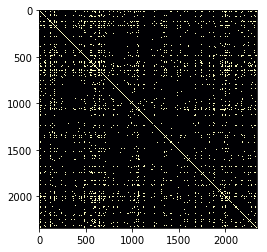

In [9]:
plt.imshow(pertinence, cmap='magma')
plt.savefig('img/pertinence_01.pdf')

On voit mieux les séries pertinentes ou non.

## Pertinences utilisateurs

In [11]:
path_series_ratings = "/Users/constancescherer/Desktop/ratings/ratings_imdb/series"
#path_series_ratings = "/Vrac/PLDAC_addic7ed/ratings/ratings_imdb/series"
d_series = dict() #{serie : {username: note, username : note}}

for serie in sorted(os.listdir(path_series_ratings)):
    if serie[0] == '.' :
        continue
    seriename = re.sub(".txt", "", serie)
    dico = dict()
    with open(path_series_ratings+"/"+serie) as file: 
        lignes = file.readlines()
    for ligne in lignes :
        l = ligne.split(" ")
        username = l[0]
        rating = l[-1]
        #username, rating = ligne.split(" ")
        rating = rating.rstrip("\n")
        rating = float(rating)
        dico[username] = rating
        if len(dico) > 1 :
            d_series[seriename] = dico

In [12]:
pickle.dump( d_series, open( "/Users/constancescherer/Desktop/pickles/d_series", "wb" ))

In [13]:
k = 3

In [14]:
d_res = dict()
for user, d_notes in d_user.items() :
    sorted_x = sorted(d_notes.items(), key=lambda kv: kv[1])
    sorted_x.reverse()
    sorted_dict = OrderedDict(sorted_x)
    l_series_preferees = list(sorted_dict.keys())[:k]
    
    moy = [] # liste de dictionnaires
    for serie in l_series_preferees :
        if serie not in d_pert_01.keys() :
            continue
        moy.append(d_pert_01[serie])

    d_res[user] = dict.fromkeys(d_series.keys(), 0)
    for i in range(0, len(moy)) :
        d = moy[i]
        for s, p in d.items() :
            d_res[user][s] += p
            
    for s, n in d_res[user].items() :
        d_res[user][s] = n/k
    

In [16]:
d_pert_user_01 = d_res
pickle.dump( d_pert_user_01, open( "/Users/constancescherer/Desktop/pickles/d_pert_user_01_k3.p", "wb" ))

In [18]:
pertinence_users = np.ones((len(d_user), len(d_series)))
i = 0
for user, d_pert_u in d_pert_user_01.items() :
    j = 0
    for serie, p in d_pert_u.items() :
        pertinence_users[i][j] = p
        j += 1
    i += 1

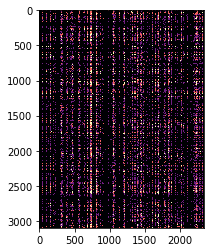

In [19]:
plt.imshow(pertinence_users, cmap='magma')
plt.savefig('pertinence_user_01.pdf')

Ici aussi, on voit beaucoup mieux.

## Pertinences utilisateurs {0,1}

Ramener aussi les pertinences utilisateurs entre 0 et 1 ?

In [20]:
d_pert_user_01_real = dict() 
for user, d_p in d_pert_user_01.items() :
    d_pert_user_01_real[user] = dict()
    for s, p in d_p.items() :
        if p != 0 :
            d_pert_user_01_real[user][s] = 1
        else : 
            d_pert_user_01_real[user][s] = 0

In [21]:
pickle.dump( d_pert_user_01_real, open( "/Users/constancescherer/Desktop/pickles/d_pert_user_01_real_k3.p", "wb" ))

In [24]:
pertinence_users = np.ones((len(d_user), len(d_series)))
i = 0
for user, d_pert_u in d_pert_user_01_real.items() :
    j = 0
    for serie, p in d_pert_u.items() :
        pertinence_users[i][j] = p
        j += 1
    i += 1

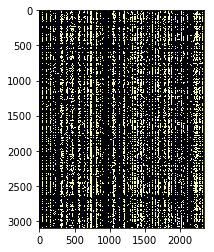

In [26]:
plt.imshow(pertinence_users, cmap='magma')
plt.savefig('img/pertinence_user_01_real.pdf')